<a href="https://colab.research.google.com/github/Rachit23110261/ML_Assignment_3_23110261_23110189_23110306/blob/main/ML_assignment_3_question_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7859 - loss: 0.6632 - val_accuracy: 0.9388 - val_loss: 0.2091
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 0.9393 - loss: 0.2098 - val_accuracy: 0.9447 - val_loss: 0.1811
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9504 - loss: 0.1646 - val_accuracy: 0.9526 - val_loss: 0.1550
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9599 - loss: 0.1345 - val_accuracy: 0.9566 - val_loss: 0.1440
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9648 - loss: 0.1153 - val_accuracy: 0.9558 - val_loss: 0.1458
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9682 - loss: 0.1017 - val_accuracy: 0.9611 - val_loss: 0.1270
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9698 - loss: 0.0952 - val_accuracy: 0.9639 - val_loss: 0.1182
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9732 - loss: 0.0866 

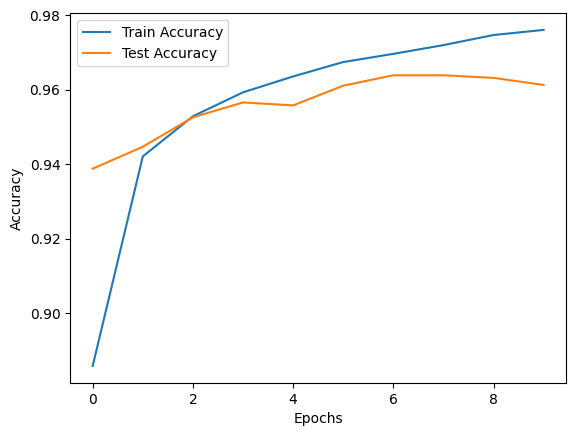

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


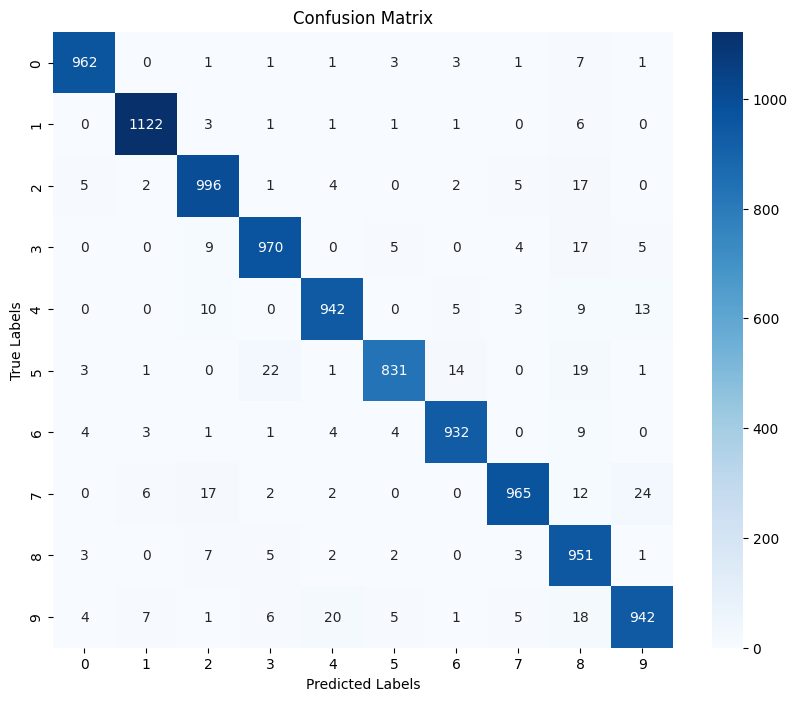

F1-Score: 0.9613813710302078


In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Load and Preprocess MNIST Dataset
# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize images to be between 0 and 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Flatten the images to 1D vectors of 784 features
X_train = X_train.reshape(-1, 28 * 28)
X_test = X_test.reshape(-1, 28 * 28)

# One-hot encode the labels (for 10 classes)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Step 2: Define MLP Architecture
model = models.Sequential()
# First hidden layer with 30 neurons
model.add(layers.Dense(30, activation='relu', input_shape=(784,)))
# Second hidden layer with 20 neurons
model.add(layers.Dense(20, activation='relu'))
# Output layer with 10 neurons (for 10 digit classes)
model.add(layers.Dense(10, activation='softmax'))

# Step 3: Compile the Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 4: Train the Model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Step 5: Evaluate the Model on the Test Set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc}')

# Step 6: Plot the Training History
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Step 7: Confusion Matrix
from sklearn.metrics import confusion_matrix, f1_score
import seaborn as sns

# Get predictions on the test set
y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Step 8: Calculate F1-Score
f1 = f1_score(y_true, y_pred, average='weighted')
print(f'F1-Score: {f1}')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8246 - loss: 0.6059 - val_accuracy: 0.9410 - val_loss: 0.1980
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9425 - loss: 0.1926 - val_accuracy: 0.9514 - val_loss: 0.1668
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9531 - loss: 0.1552 - val_accuracy: 0.9580 - val_loss: 0.1443
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9647 - loss: 0.1194 - val_accuracy: 0.9592 - val_loss: 0.1330
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9678 - loss: 0.1059 - val_accuracy: 0.9604 - val_loss: 0.1353
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9707 - loss: 0.0948 - val_accuracy: 0.9629 - val_loss: 0.1225
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9736 - loss: 0.0844 - val_accuracy: 0.9664 - val_loss: 0.1147
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9762 - loss: 0.0747 - 

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Test Accuracy: 0.9268


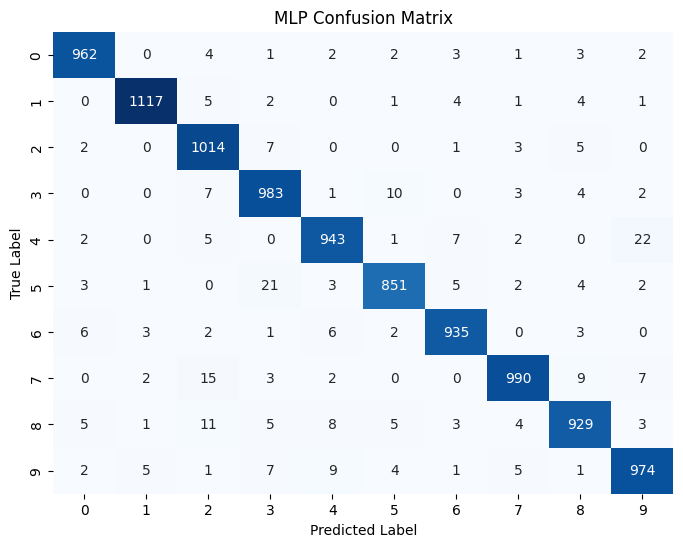

MLP F1-Score: 0.969801741674901



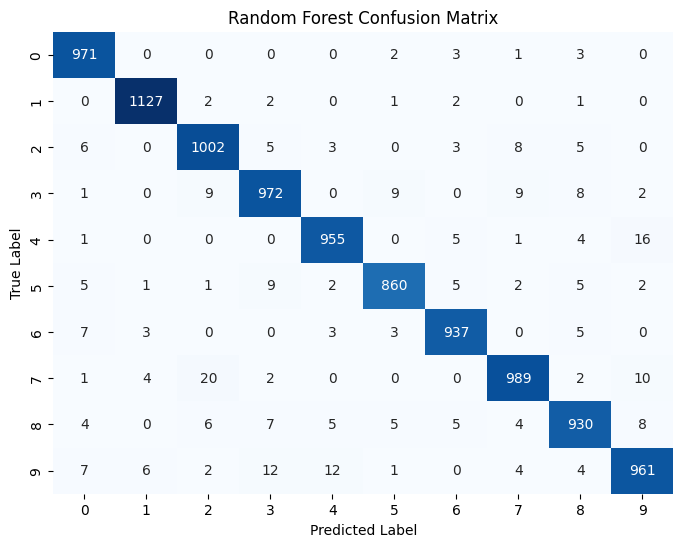

Random Forest F1-Score: 0.9703722598097009



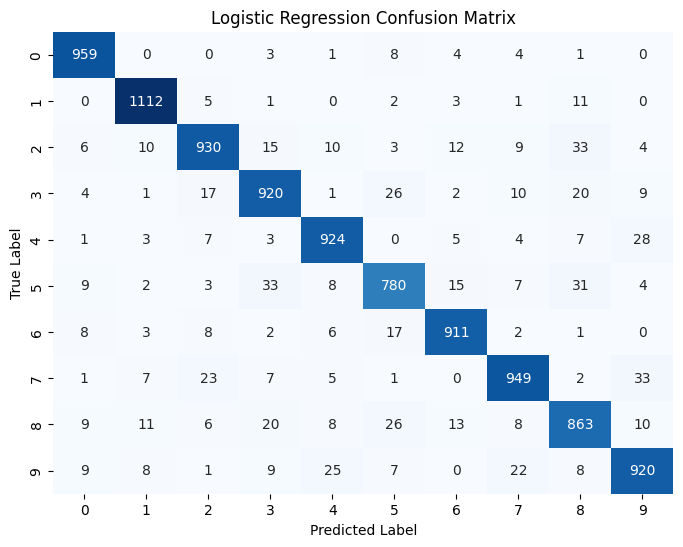

Logistic Regression F1-Score: 0.9266361914125759



In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize the images (scale pixel values to [0, 1])
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Flatten the images into 1D vectors of size 28x28 = 784
X_train_flat = X_train.reshape(-1, 28 * 28)
X_test_flat = X_test.reshape(-1, 28 * 28)

# One-hot encode the labels for MLP (Keras model expects one-hot encoded labels)
y_train_onehot = tf.keras.utils.to_categorical(y_train, 10)
y_test_onehot = tf.keras.utils.to_categorical(y_test, 10)

### MLP Training

# Define the MLP model
mlp_model = models.Sequential([
    layers.Dense(30, activation='relu', input_shape=(784,)),  # First hidden layer with 30 neurons
    layers.Dense(20, activation='relu'),  # Second hidden layer with 20 neurons
    layers.Dense(10, activation='softmax')  # Output layer with 10 neurons (one per class)
])

# Compile the model using Adam optimizer and categorical cross-entropy loss
mlp_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the MLP model
mlp_history = mlp_model.fit(X_train_flat, y_train_onehot, epochs=10, batch_size=32, validation_data=(X_test_flat, y_test_onehot))

# Evaluate the MLP model on the test set
mlp_test_loss, mlp_test_acc = mlp_model.evaluate(X_test_flat, y_test_onehot, verbose=2)
print(f'MLP Test Accuracy: {mlp_test_acc}')

# Get MLP predictions and evaluate performance
y_pred_mlp = np.argmax(mlp_model.predict(X_test_flat), axis=1)

### Random Forest Training

# Train a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_flat, y_train)

# Predict on the test set using Random Forest
y_pred_rf = rf_model.predict(X_test_flat)

# Evaluate Random Forest accuracy
rf_test_acc = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Test Accuracy: {rf_test_acc}')

### Logistic Regression Training

# Train a Logistic Regression model (you may use a subset for faster training)
lr_model = LogisticRegression(max_iter=200, random_state=42)
lr_model.fit(X_train_flat, y_train)

# Predict on the test set using Logistic Regression
y_pred_lr = lr_model.predict(X_test_flat)

# Evaluate Logistic Regression accuracy
lr_test_acc = accuracy_score(y_test, y_pred_lr)
print(f'Logistic Regression Test Accuracy: {lr_test_acc}')

### Evaluation: Confusion Matrix and F1-Score for All Models

def evaluate_model(y_true, y_pred, model_name):
    # Confusion matrix
    conf_matrix = confusion_matrix(y_true, y_pred)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    # F1-score (weighted)
    f1 = f1_score(y_true, y_pred, average='weighted')
    print(f'{model_name} F1-Score: {f1}\n')

# MLP evaluation
evaluate_model(y_test, y_pred_mlp, "MLP")

# Random Forest evaluation
evaluate_model(y_test, y_pred_rf, "Random Forest")

# Logistic Regression evaluation
evaluate_model(y_test, y_pred_lr, "Logistic Regression")


**Observations**   
we can see that , our model performance is in order of RF> MLP > LR. The probable reason for this obsrrvation is based on how our algorithm captures non linear relationship between features. As LR mostly captures linear relationship, So we do polynomial feature addition to overcome linear fitting but still it is unable to perform better than RF and MLP. We can also observe that if we increase the nodes in hidden layers than MLP will perform better than Random forest .


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8034 - loss: 0.6557 - val_accuracy: 0.9354 - val_loss: 0.2263
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9441 - loss: 0.1958 - val_accuracy: 0.9517 - val_loss: 0.1638
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9548 - loss: 0.1546 - val_accuracy: 0.9547 - val_loss: 0.1491
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9635 - loss: 0.1236 - val_accuracy: 0.9572 - val_loss: 0.1394
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9689 - loss: 0.1056 - val_accuracy: 0.9619 - val_loss: 0.1257
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9711 - loss: 0.0960 - val_accuracy: 0.9576 - val_loss: 0.1405
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9733 - loss: 0.0872 - val_accuracy: 0.9628 - val_loss: 0.1248
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/

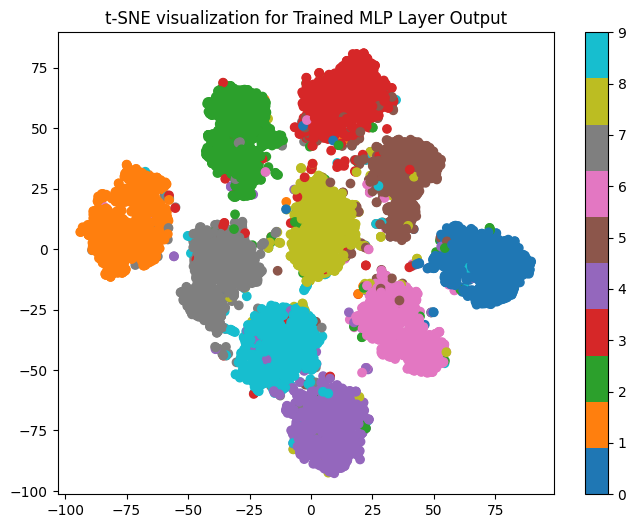

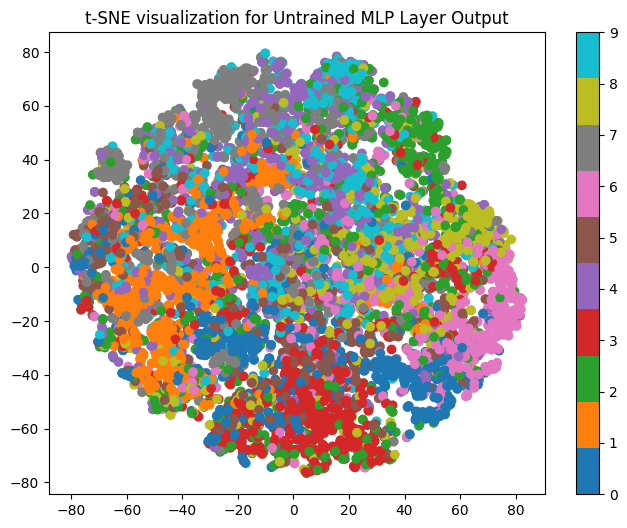

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import Dense
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Step 1: Redefine MLP model using Input() explicitly
input_layer = Input(shape=(784,))
x = Dense(30, activation='relu')(input_layer)  # First hidden layer
x = Dense(20, activation='relu')(x)            # Second hidden layer (this is what we'll visualize)
output_layer = Dense(10, activation='softmax')(x)  # Output layer

# Now define the model
mlp_model = Model(inputs=input_layer, outputs=output_layer)
intermediate_layer_model = Model(inputs=mlp_model.input, outputs=mlp_model.layers[2].output)
trained_layer_output = intermediate_layer_model.predict(X_test_flat)
tsne = TSNE(n_components=2, random_state=42)
untrained_tsne_output = tsne.fit_transform(trained_layer_output)
# Step 2: Compile and train the model
mlp_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
mlp_model.fit(X_train_flat, y_train_onehot, epochs=10, batch_size=32, validation_data=(X_test_flat, y_test_onehot))

# Step 3: Define a model to extract outputs from the second hidden layer (20 neurons)
intermediate_layer_model = Model(inputs=mlp_model.input, outputs=mlp_model.layers[2].output)

# Step 4: Get the output from the second hidden layer for the test set
trained_layer_output = intermediate_layer_model.predict(X_test_flat)

# Step 5: Perform t-SNE on the output from the trained second hidden layer
tsne = TSNE(n_components=2, random_state=42)
trained_tsne_output = tsne.fit_transform(trained_layer_output)
# Step 6: Plot t-SNE for trained model
plt.figure(figsize=(8, 6))

# Assuming y_test is already in integer label format (0-9)
plt.scatter(trained_tsne_output[:, 0], trained_tsne_output[:, 1], c=y_test, cmap='tab10')  # No need for np.argmax here
plt.colorbar()
plt.title('t-SNE visualization for Trained MLP Layer Output')
plt.show()

# Step 11: Plot t-SNE for untrained model
plt.figure(figsize=(8, 6))
plt.scatter(untrained_tsne_output[:, 0], untrained_tsne_output[:, 1], c=y_test, cmap='tab10')  # No need for np.argmax here
plt.colorbar()
plt.title('t-SNE visualization for Untrained MLP Layer Output')
plt.show()


**Conclusion**
 1. Clustering of Data Points
1. Trained Model: If the t-SNE visualization of the trained model shows distinct clusters for different digit classes (0-9), it indicates that the model has learned to effectively separate the different digits based on their features. Each cluster representing a digit would suggest that the model has captured the underlying structure of the data well.
2. Untrained Model: The untrained model's t-SNE visualization is likely to show a more uniform distribution of data points, with less discernible clustering. This indicates that the model has not yet learned meaningful patterns or relationships within the data.

 2. Representation of Classes
1. Trained Model: The t-SNE plot might show that points from the same class are closer together in the embedded space, suggesting that the model has successfully learned to represent similar looking digits in proximity to each other.
2. Untrained Model: In contrast, if the points from the same class are scattered across the plot in the untrained model, it implies that the features extracted from the data have not yet been effectively organized according to the digit classes.

In [4]:
# Step 1: Load and Preprocess Fashion-MNIST Dataset
# Load Fashion-MNIST dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()



29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [5]:
# Normalize images to be between 0 and 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Flatten the images to 1D vectors of 784 features (28x28 images)
X_train = X_train.reshape(-1, 28 * 28)
X_test = X_test.reshape(-1, 28 * 28)

# One-hot encode the labels (for 10 classes in Fashion-MNIST)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


313/313 - 0s - 1ms/step - accuracy: 0.1213 - loss: 27.1989

Test accuracy: 0.12129999697208405
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


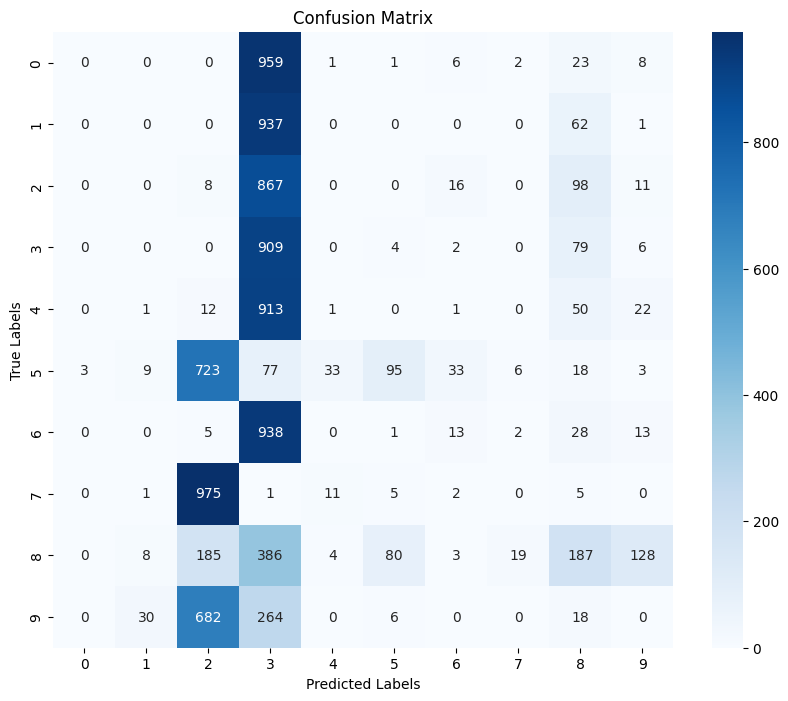

F1-Score: 0.0679165574571874


In [6]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Step 1: Load and Preprocess Fashion-MNIST Dataset
# Load Fashion-MNIST dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Normalize images to be between 0 and 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Flatten the images to 1D vectors of 784 features (28x28 images)
X_train = X_train.reshape(-1, 28 * 28)
X_test = X_test.reshape(-1, 28 * 28)

# One-hot encode the labels (for 10 classes in Fashion-MNIST)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# # Step 2: Define MLP Architecture
# model = models.Sequential()
# # First hidden layer with 30 neurons
# model.add(layers.Dense(30, activation='relu', input_shape=(784,)))
# # Second hidden layer with 20 neurons
# model.add(layers.Dense(20, activation='relu'))
# # Output layer with 10 neurons (for 10 classes)
# model.add(layers.Dense(10, activation='softmax'))

# # Step 3: Compile the Model
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# # Step 4: Train the Model
# history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Step 5: Evaluate the Model on the Test Set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc}')



# Step 7: Confusion Matrix
# Get predictions on the test set
y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Step 8: Calculate F1-Score
f1 = f1_score(y_true, y_pred, average='weighted')
print(f'F1-Score: {f1}')


**Observation**

So As our model was trained on Digits dataset, Obviously it was sure that it will perform badly on the Fashion Dataset, as Shown by the accuracy (0.12)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


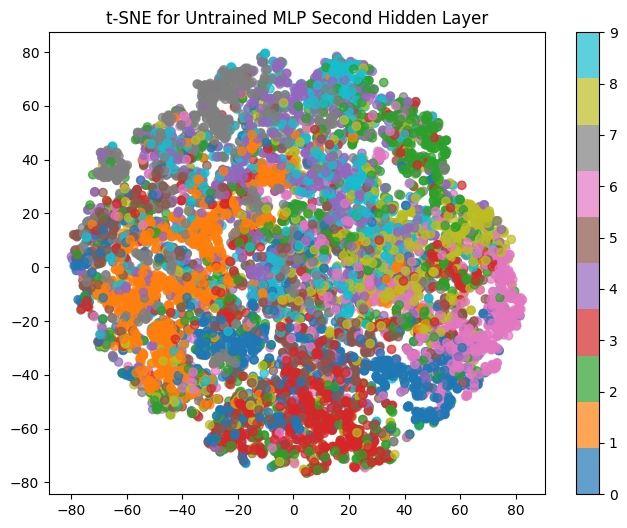

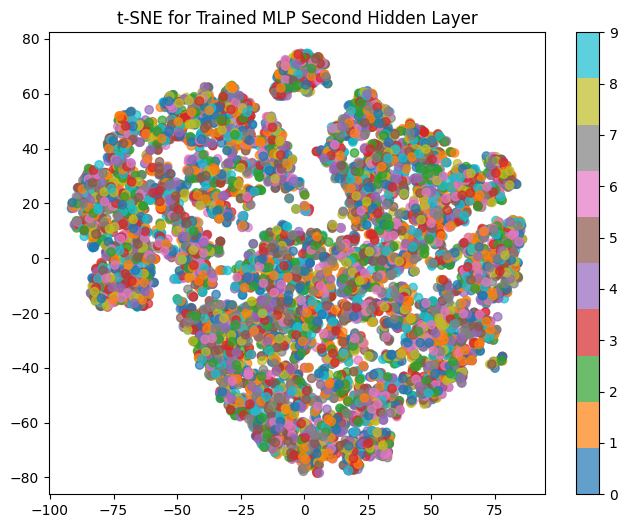

In [8]:
y_test_labels = np.argmax(y_test_onehot, axis=1)
intermediate_layer_model = Model(inputs=mlp_model.input, outputs=mlp_model.layers[2].output)

# Step 6: Perform t-SNE on the output from the trained second hidden layer (after training)
trained_layer_output = intermediate_layer_model.predict(X_test)
tsne_trained = TSNE(n_components=2, random_state=42)
trained_tsne_output = tsne_trained.fit_transform(trained_layer_output)

# Step 7: Plot t-SNE for the untrained model
plt.figure(figsize=(8, 6))
plt.scatter(untrained_tsne_output[:, 0], untrained_tsne_output[:, 1], c=y_test_labels, cmap='tab10', alpha=0.7)
plt.colorbar()
plt.title('t-SNE for Untrained MLP Second Hidden Layer')
plt.show()

# Step 8: Plot t-SNE for the trained model
plt.figure(figsize=(8, 6))
plt.scatter(trained_tsne_output[:, 0], trained_tsne_output[:, 1], c=y_test_labels, cmap='tab10', alpha=0.7)
plt.colorbar()
plt.title('t-SNE for Trained MLP Second Hidden Layer')
plt.show()


**Comparison With MNIST**

So, As we can see it has not clustured into different classes like in MNIST dataset. But we can see that the distribution is not uniform because of the pretrained neural network. It tried to cluster on the basis of their likeliness to corresponding number. Means if there was an reversed shoe, it may had put it in the 7th class of Digits dataset.
